C:\Users\Inderpreet singh\AppData\Local\Temp\ipykernel_14180\3143769369.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
C:\Users\Inderpreet singh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0915
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.3787e-04
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.3280e-04
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.8178e-04
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.4611e-04
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.5050e-04
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.4442e-04
Epoch 8/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.5096e-04
Epoch 9/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.9131e-04
Epoch 10/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.0381e-04
Epoch 11/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.2054e-04
Epoch 12/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.2654e-04
Epoch 13/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.8671e-04
Epoch 14/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.8918e-04
Epoch 15/30
61/61 ━

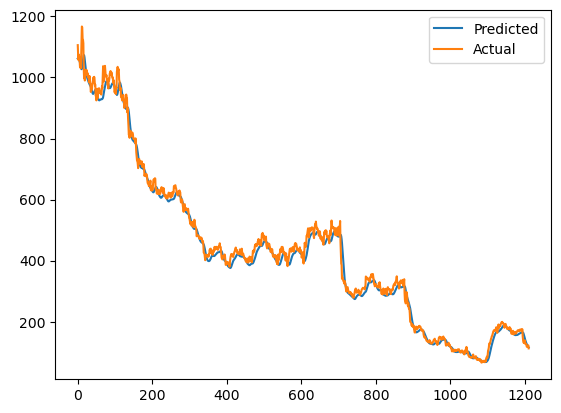

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Next day predicted value: [[114.64236]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Next 10 days predicted values:
[[114.64235633]
 [113.50805222]
 [112.44217591]
 [111.42545478]
 [110.44463046]
 [109.49118382]
 [108.55999026]
 [107.64726576]
 [106.75048903]
 [105.86872123]]


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential


df = pd.read_csv(r"C:\Users\Inderpreet singh\Downloads\TATA Motors.csv")


df = df.fillna(method='ffill')

x=df['Open']
x = np.array(x).reshape((len(x), 1))  


scaler_x = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler_x.fit_transform(x)

x_stock = []
y_stock = []


for i in range(30, len(x_scaled)):
    x_stock.append(x_scaled[i-30:i])
    y_stock.append(x_scaled[i])

x_stock = np.array(x_stock)
y_stock = np.array(y_stock)

lstm = Sequential()
lstm.add(LSTM(units=50, input_shape=(x_stock.shape[1], x_stock.shape[2]), return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=20, return_sequences=False))
lstm.add(Dense(units=1))  # No activation for regression

lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0), loss="mean_squared_error")


history = lstm.fit(x_stock, y_stock, batch_size=20, epochs=30)


print(history.history['loss'])


y_pred = lstm.predict(x_stock)


y_pred_inversed = scaler_x.inverse_transform(y_pred)
y_stock_inversed = scaler_x.inverse_transform(y_stock.reshape(-1, 1))


plt.plot(y_pred_inversed, label="Predicted")
plt.plot(y_stock_inversed, label="Actual")
plt.legend()
plt.show()


last_30_days = x_scaled[-30:]  # Get the last 30 days of scaled data
last_30_days = np.reshape(last_30_days, (1, 30, 1))

next_day_prediction = lstm.predict(last_30_days)
next_day_prediction_inversed = scaler_x.inverse_transform(next_day_prediction)
print(f"Next day predicted value: {next_day_prediction_inversed}")


predicted = np.array([])
for i in range(10): 
    last_30_days = x_scaled[-30:] 
    next_day = lstm.predict(np.reshape(last_30_days, (1, 30, 1)))  
    
   
    predicted = np.append(predicted, next_day)  
    
    
    x_scaled = np.append(x_scaled, next_day).reshape(-1, 1)


predicted = scaler_x.inverse_transform(np.reshape(predicted, (10, 1)))


print("Next 10 days predicted values:")
print(predicted)
